## Import Python Libraries

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import  preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
sns.set_style('whitegrid')


## 1. Problem

The aim of this notebook is describe the steps of how to dvelop a machine learning model for predicting Breast Cancer

## 2.  Data Collection

## 2.1  Load the dataset

This notebook will use the breast cancer data collected from the online source

In [126]:
data = pd.read_csv('tunadata.csv')

## 2.2  Preview the data

In [127]:
data.head()

,focalLength,weight,gonadalWeight,maturityStage,species,Sex
0,72.8,8.02,9.05,II,Big Eye,F
1,81.2,9.48,18.27,II,Big Eye,F
2,73.7,8.28,7.05,II,Big Eye,M
3,74.5,7.54,5.59,II,Big Eye,M
4,75.5,8.50,12.67,II,Big Eye,F


## 3. Data Cleaning and Pre-Processing

Cleanse the data to remove errors, duplicate or missing values

In [128]:
data.isna().sum()

focalLength        0
weight             0
gonadalWeight    177
maturityStage      0
species            0
Sex                0
dtype: int64

## 3.1 Handling Missing Values

In [129]:

# Calculate the mean of the 'gonadalWeight' column
mean_gonadal_weight = data['gonadalWeight'].mean()

# Fill missing values in the 'gonadalWeight' column with its mean value
data['gonadalWeight'].fillna(mean_gonadal_weight, inplace=True)

In [130]:
# Preview the data again
data.head()

,focalLength,weight,gonadalWeight,maturityStage,species,Sex
0,72.8,8.02,9.05,II,Big Eye,F
1,81.2,9.48,18.27,II,Big Eye,F
2,73.7,8.28,7.05,II,Big Eye,M
3,74.5,7.54,5.59,II,Big Eye,M
4,75.5,8.50,12.67,II,Big Eye,F


In [131]:
# Check again the missing values
data.isna().sum()

focalLength      0
weight           0
gonadalWeight    0
maturityStage    0
species          0
Sex              0
dtype: int64

## 3.1 Categorical Encoding

In [132]:
# Use One-Hot-Encoder, since the values are nominal 
#data_encoded = pd.get_dummies(data, columns=['species'],dtype=int)
def cate_enco (data):
    le = preprocessing.LabelEncoder()
    #data.gender = le.fit_transform(data.gender)
    data['maturityStage'] = le.fit_transform(data['maturityStage'])
    data['Sex'] = le.fit_transform(data['Sex'])
    data['species'] = le.fit_transform(data['species'])
    return data

In [133]:
cate_enco(data).head()

,focalLength,weight,gonadalWeight,maturityStage,species,Sex
0,72.8,8.02,9.05,1,0,0
1,81.2,9.48,18.27,1,0,0
2,73.7,8.28,7.05,1,0,1
3,74.5,7.54,5.59,1,0,1
4,75.5,8.50,12.67,1,0,0


In [192]:
# save the cleaned data
data.to_csv('tunadata_cleaned.csv')

## 4. Exploratory Data Analysis (EDA)

Perform EDA to gain insights into the data and identify patterns, trends, and relationships. Also visulize the data using visual aids like graphs and plots

## 4.1 Descrptive Analysis

In [134]:
# Descriptive statistics for numerical values
data.describe()

,focalLength,weight,gonadalWeight,maturityStage,species,Sex
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,60.955004,6.562044,69.638362,1.981043,1.878555,0.545024
std,27.218860,78.274227,107.225721,1.254132,1.191280,0.498116
min,6.256000,0.215000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.600000,0.000000,1.000000,1.000000,0.000000
50%,57.000000,2.857500,28.480000,2.000000,2.000000,1.000000
75%,64.025000,4.524250,77.882500,3.000000,3.000000,1.000000
max,470.000000,3210.000000,1546.700000,5.000000,4.000000,1.000000


## 4.1 Correlation

In [135]:
data.corr()

,focalLength,weight,gonadalWeight,maturityStage,species,Sex
focalLength,1.000000,0.037211,0.306500,0.050677,0.013755,-0.015710
weight,0.037211,1.000000,0.030222,0.007085,0.020740,0.022685
gonadalWeight,0.306500,0.030222,1.000000,0.308136,-0.065786,-0.184912
maturityStage,0.050677,0.007085,0.308136,1.000000,0.067098,-0.238699
species,0.013755,0.020740,-0.065786,0.067098,1.000000,-0.012257
Sex,-0.015710,0.022685,-0.184912,-0.238699,-0.012257,1.000000


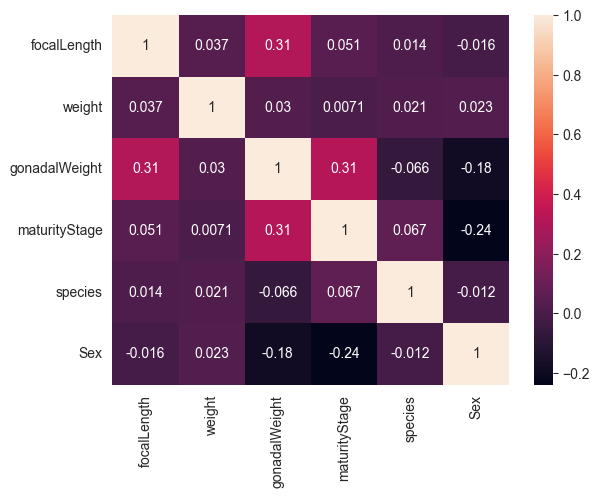

In [136]:
sns.heatmap(data.corr(),annot=True)
plt.show()

## 5. Feature Engineering

## 5.1 Feature Selection

In [106]:
X = data.drop(columns='Sex')
y = data['Sex']

In [107]:
# Split the data
rforest = RandomForestClassifier(max_depth = 15,min_samples_leaf =15 , min_samples_split = 100, n_estimators = 50 , random_state =1)

In [108]:
rforest.fit(X,y)

RandomForestClassifier(max_depth=15, min_samples_leaf=15, min_samples_split=100,
                       n_estimators=50, random_state=1)

In [109]:
imp_ft_rf = pd.Series(rforest.feature_importances_, index=X.columns).sort_values(ascending = True)
print(imp_ft_rf)

species          0.025646
focalLength      0.064350
weight           0.075582
maturityStage    0.205420
gonadalWeight    0.629002
dtype: float64


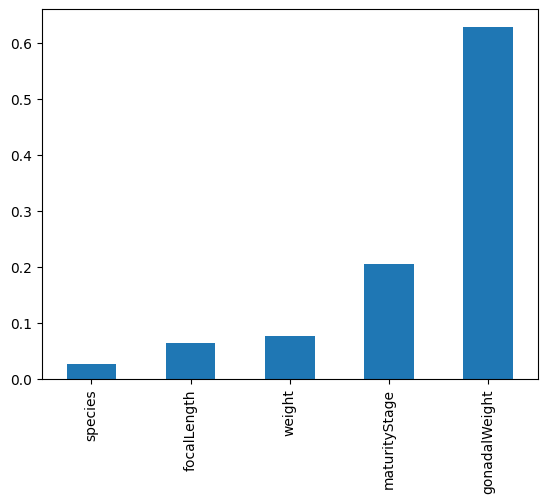

In [110]:
imp_ft_rf.plot(kind = 'bar')
plt.show()

### 5.2 SelectFromModel

In [115]:
select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=1), threshold='mean')

In [116]:
select.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=50,
                                                 random_state=1),
                threshold='mean')

In [122]:
X_features = select.transform(X)
print('The original',X.shape)
print('Importance', X_features.shape)

The original (1688, 5)
Importance (1688, 1)


In [123]:
feature = ['focalLength', 'weight', 'gonadalWeight', 'maturityStage', 'species','Sex']

In [124]:
for feature_list_index in select.get_support(indices=True):
    print(feature[feature_list_index])

gonadalWeight


In [151]:
X2 = data[['gonadalWeight','focalLength']]
y2 = data['Sex']

## 6. Data Modeling

LogisticRegression()

The model accuracy is: 0.6035502958579881


In [182]:
def classifiers(X_train,y_train, score='f1'):
    knn     =  KNeighborsClassifier()
    #svm     = SVC()
    gnb     =  GaussianNB()
    log     =  LogisticRegression()
    dTree   =  tree.DecisionTreeClassifier()
    rForest =  RandomForestClassifier()
    adboost = AdaBoostClassifier()
   
    
    model_names = ["Nearest Neighbors",
                   "Naive Bayes",
                   "Logistic",
                   "Decision Tree",
                   "Random Forest",
                   "AdaBoost"]
    models = [knn,gnb, log, dTree, rForest,adboost]
     
 
    avg_results = []
    model_time =  []
    
    for (i,model) in enumerate(models):
      
        skfold = model_selection.StratifiedKFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=skfold, scoring=score)
        avg_results.append(cv_results.mean())
        msg = "%s: %.2f" % (model_names[i], cv_results.mean())
        print(msg)
      
        
    return avg_results, model_names,  model_time   

In [183]:
result, names,  model_time  = classifiers(X2,y2)

Nearest Neighbors: 0.72
Naive Bayes: 0.68
Logistic: 0.69
Decision Tree: 0.70
Random Forest: 0.73
AdaBoost: 0.76


## 7. Model Training

Train the selected model on tyhe training data to learn from the pattern and relationship present in the data

In [188]:
#splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [189]:
#Fitting Multiple Linear Regression to the training set
adboost = AdaBoostClassifier()
adboost.fit(X_train, y_train)

AdaBoostClassifier()

In [190]:
y_pred = adboost.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print('The model accuracy is: {}'.format(accuracy))

The model accuracy is: 0.747534516765286


## 8. Model Evaluation

## 9. Model Deployment

## 11. Enterpretation and Communication of Results

## 12. Monitoring and Maintanence